In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif

In [16]:
df = pd.read_csv('/Users/bryanzhang/Desktop/career/projects/harmonic_horizons/data/tracks2.csv')

In [17]:
df.dropna(axis=0, how='any', inplace=True)
removed_cols = ['Unnamed: 0', 'type', 'uri', 'track_href', 'analysis_url', 'id']
df = df.drop(columns=removed_cols)

song_counts = df['name'].value_counts()
duplicate_songs = song_counts[song_counts > 1].index

track_df = df[~df['name'].isin(duplicate_songs)]
track_df = track_df.set_index('name')

In [18]:
def adjust_time(time):
    return time/1000

track_df['duration_ms'] = track_df['duration_ms'].apply(adjust_time)
track_df = track_df.rename(columns={'duration_ms': 'duration_s'})

In [19]:
mood_distribution = track_df.groupby('mood').describe()
mood_distribution

danceability                                                     \
                 count      mean       std     min      25%    50%    75%   
mood                                                                        
angry           4352.0  0.529512  0.187707  0.0423  0.39200  0.524  0.666   
calm            5949.0  0.440966  0.226734  0.0000  0.21100  0.453  0.631   
energetic       3754.0  0.641979  0.157841  0.0718  0.54500  0.662  0.754   
happy           2306.0  0.641683  0.168606  0.0625  0.56125  0.671  0.757   
sad             4057.0  0.511428  0.176458  0.0000  0.39600  0.521  0.638   

                  energy            ... time_signature      popularity  \
             max   count      mean  ...            75%  max      count   
mood                                ...                                  
angry      0.975  4352.0  0.782609  ...            4.0  5.0     4352.0   
calm       0.980  5949.0  0.223554  ...            4.0  5.0     5949.0   
energetic  0.979  3754.0  0.717877  ...            4.0  5.0     3754.0   
happy      0.978  2306.0  0.626359  ...            4.0  5.0     2306.0   
sad        0.975  4057.0  0.409668  ...            4.0  5.0     4057.0   

                                                              
                mean        std  min   25%   50%   75%   max  
mood                                                          
angry      39.150506  23.259621  0.0  23.0  42.0  57.0  90.0  
calm       40.525130  17.004635  0.0  32.0  42.0  52.0  89.0  
energetic  39.497869  23.271303  0.0  25.0  41.0  58.0  92.0  
happy      51.905030  22.813706  0.0  40.0  58.0  69.0  99.0  
sad        39.526004  24.059947  0.0  22.0  41.0  58.0  94.0  

[5 rows x 112 columns]

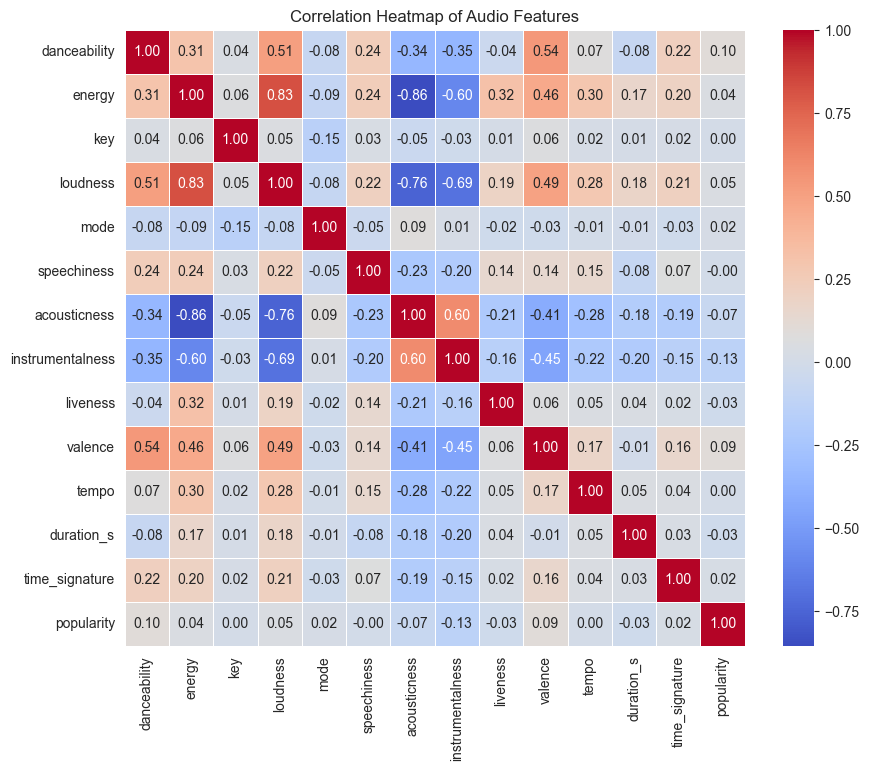

In [20]:
corr_matrix = track_df.drop(columns=['mood']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Audio Features')
plt.show()

In [21]:
X = track_df.drop(columns=['mood'])
y = track_df['mood']

F_values, P_values = f_classif(X, y)
anova_results = pd.DataFrame({'Feature': X.columns, 'F-Value': F_values, 'P-Value': P_values})

anova_results.sort_values(by='P-Value', ascending=False)

,Feature,F-Value,P-Value
2,key,9.626043,8.963804e-08
4,mode,32.886282,2.232716e-27
12,time_signature,150.522747,4.131929e-127
13,popularity,162.496195,3.612036e-137
8,liveness,167.294705,3.407866e-141
11,duration_s,265.571805,6.806863e-223
10,tempo,361.996327,1.136599e-301
5,speechiness,387.728434,1.828043e-322
0,danceability,851.107771,0.000000e+00
1,energy,4935.026342,0.000000e+00


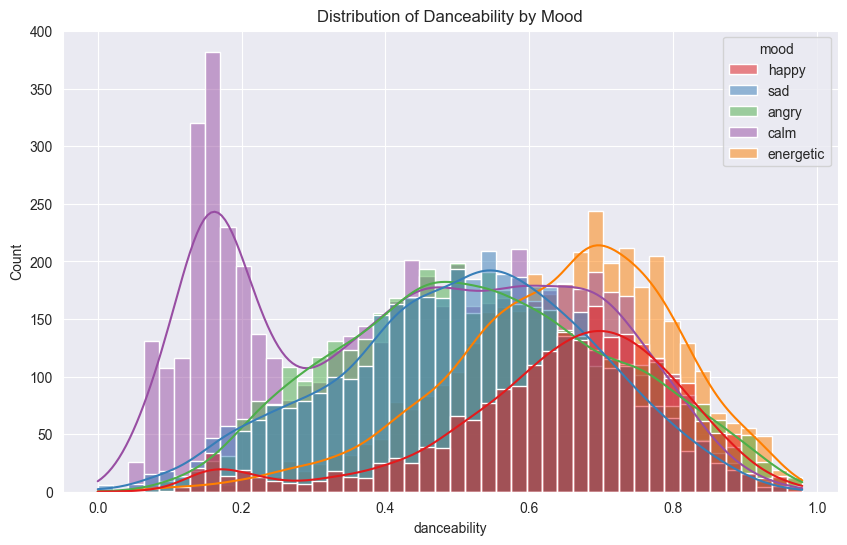

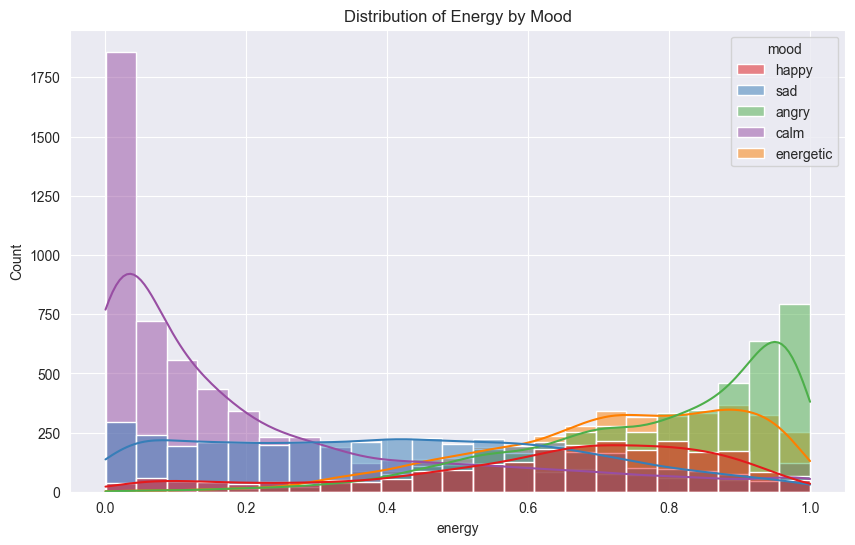

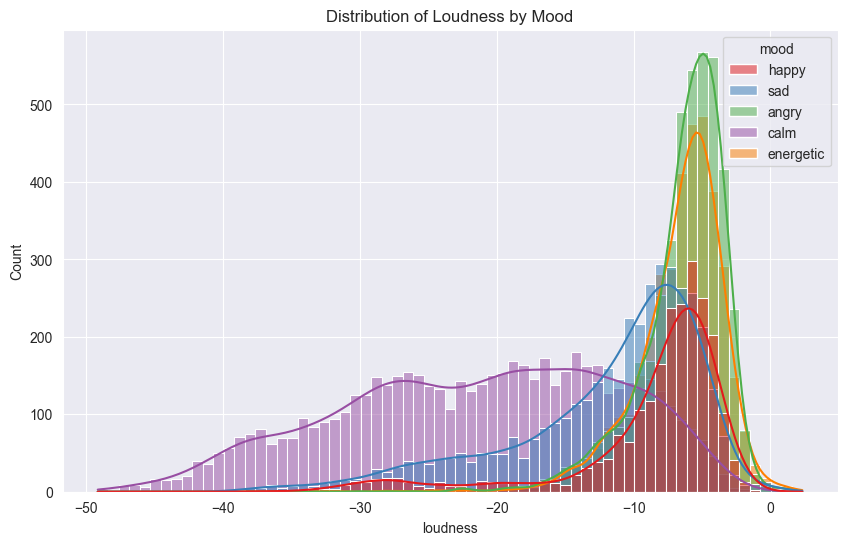

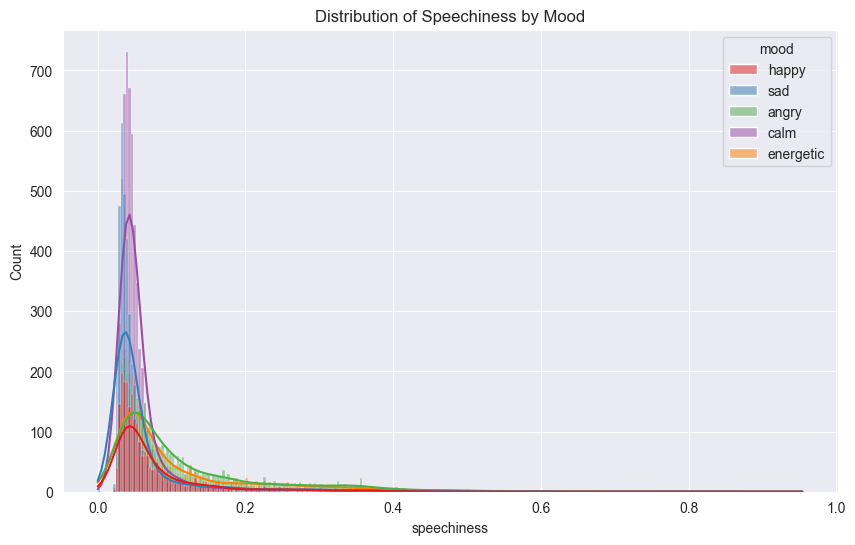

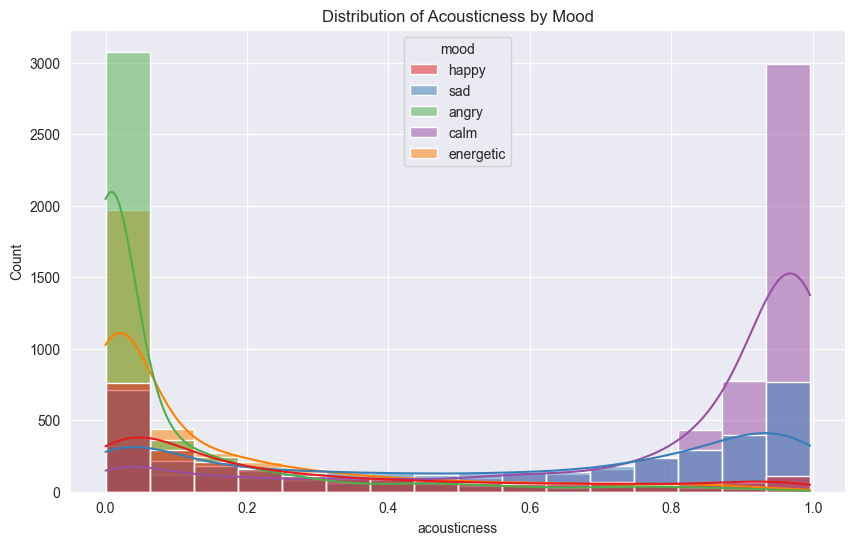

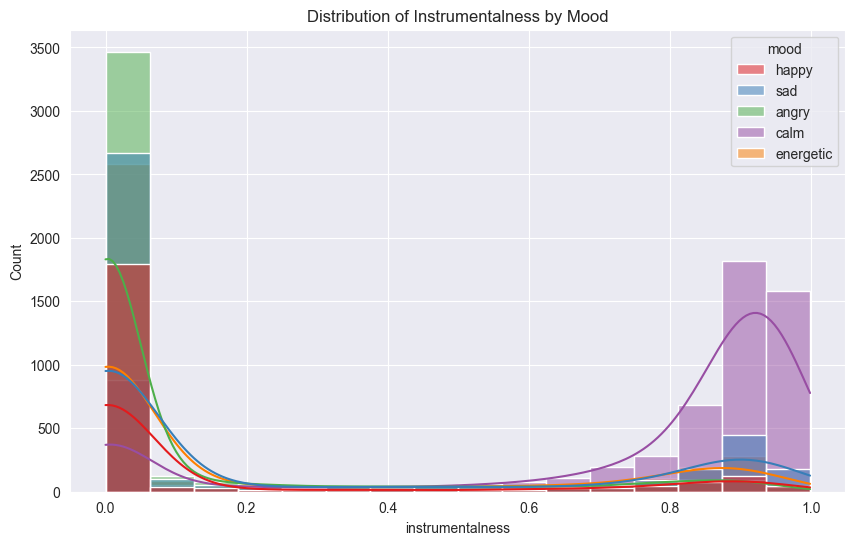

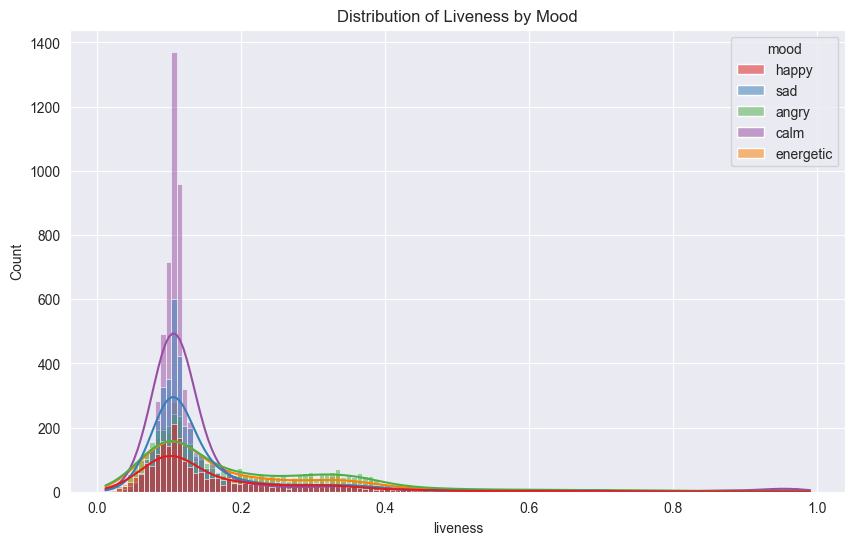

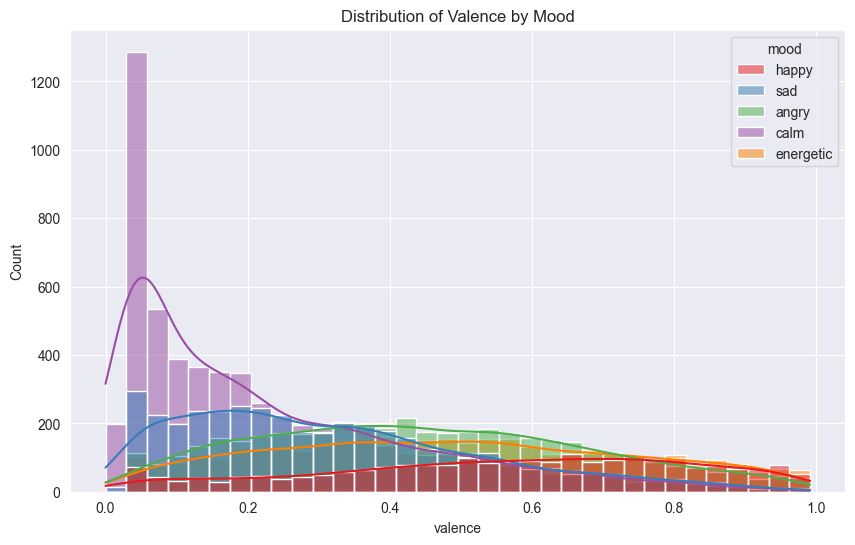

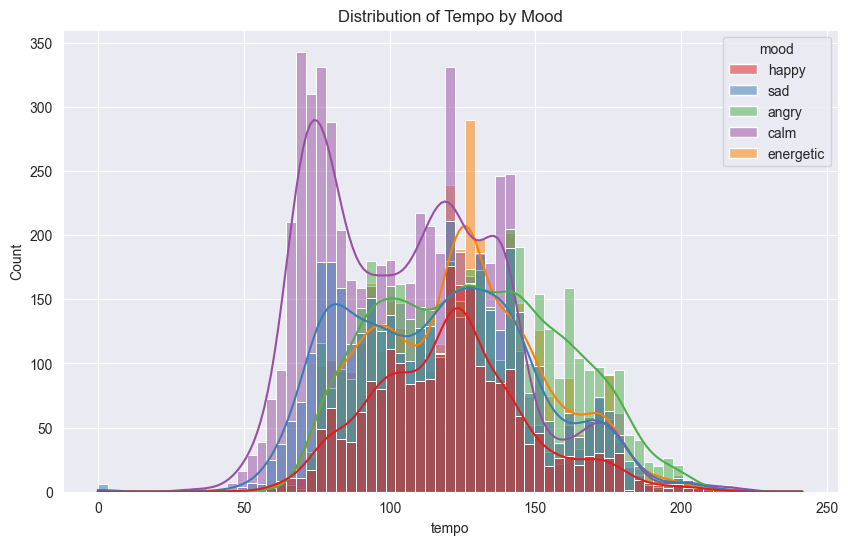

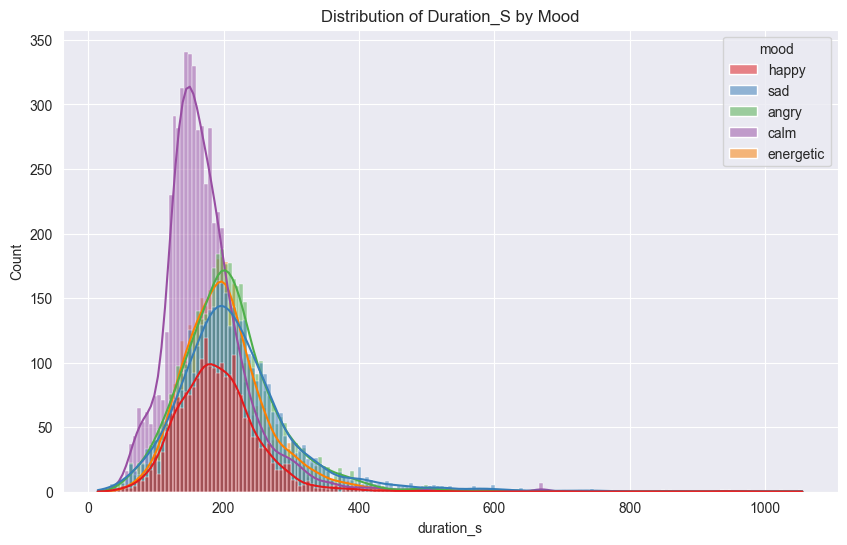

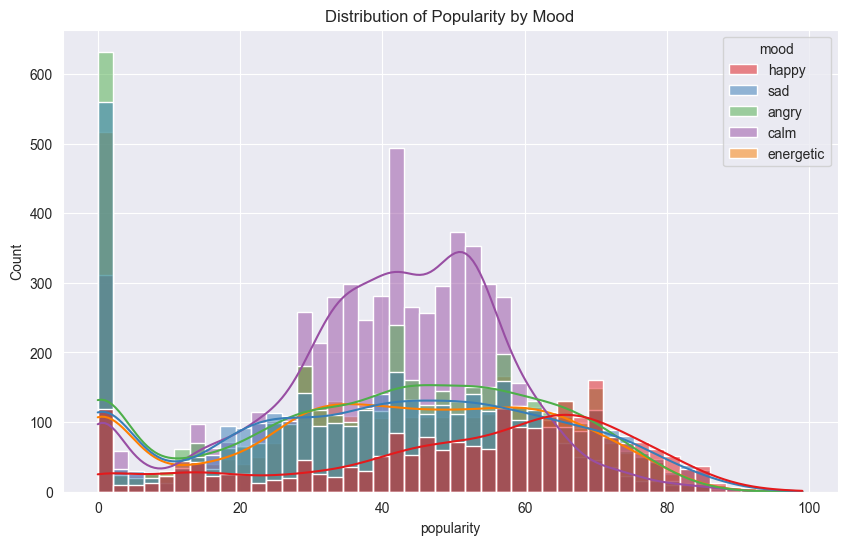

In [22]:
def create_visualization(df, vis_type, **kwargs):
    audio_features = df.drop(columns=['mood', 'key', 'time_signature', 'mode']).columns
    
    for feature in audio_features:
        plt.figure(figsize=(10, 6))
        vis_type(data=df, x=feature, **kwargs)
        
        plt.title(f'Distribution of {feature.title()} by Mood')
        plt.xlabel(f'{feature}')
        
        if vis_type == sns.histplot:
            plt.ylabel('Count')
        else:
            plt.ylabel('Value')
            plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
        
        plt.show()

create_visualization(track_df, sns.histplot, hue='mood', palette='Set1', kde=True)

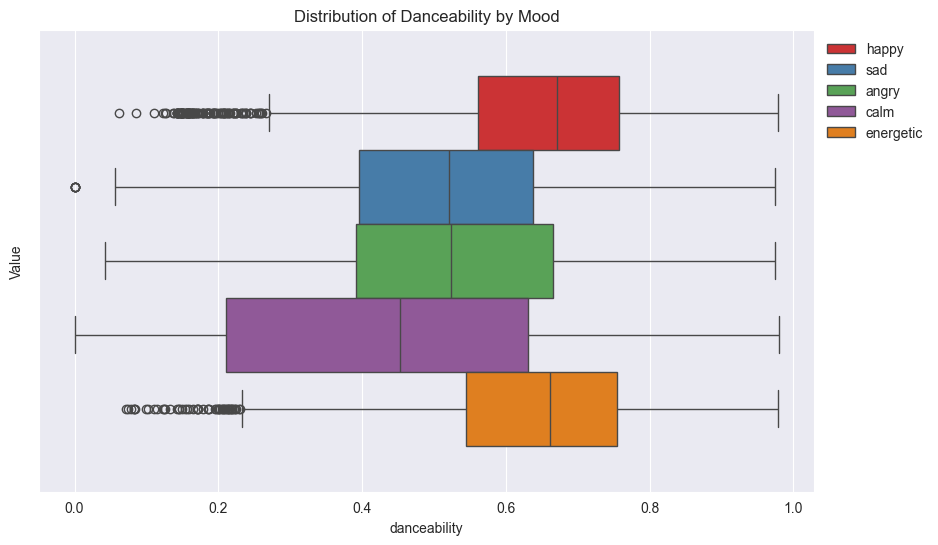

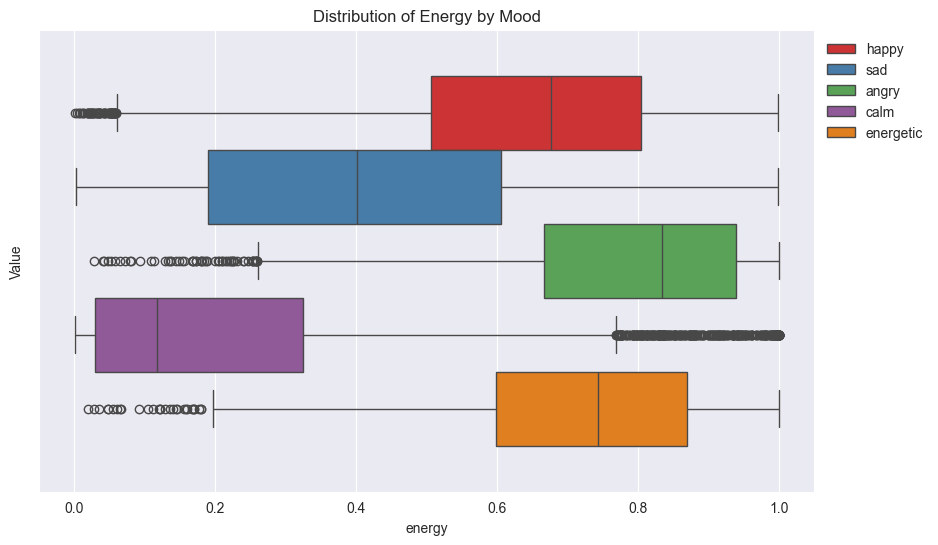

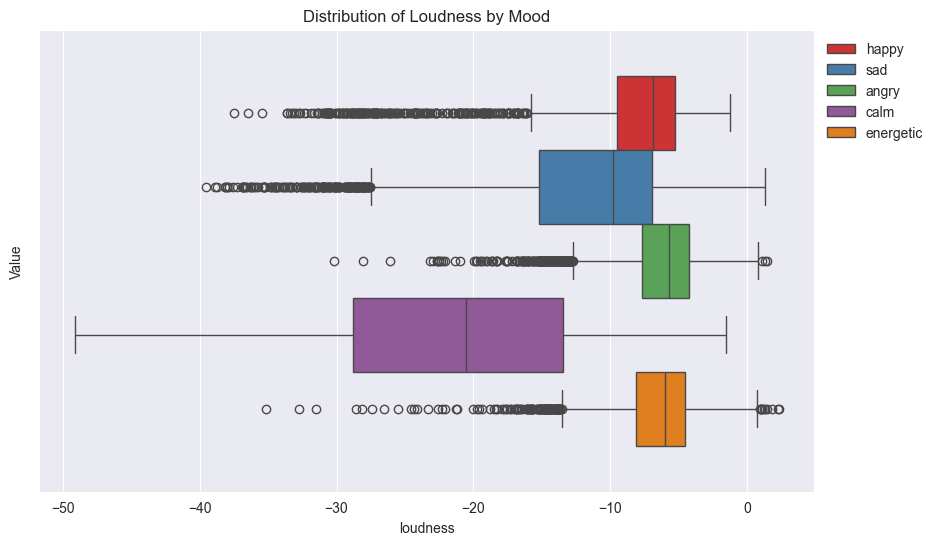

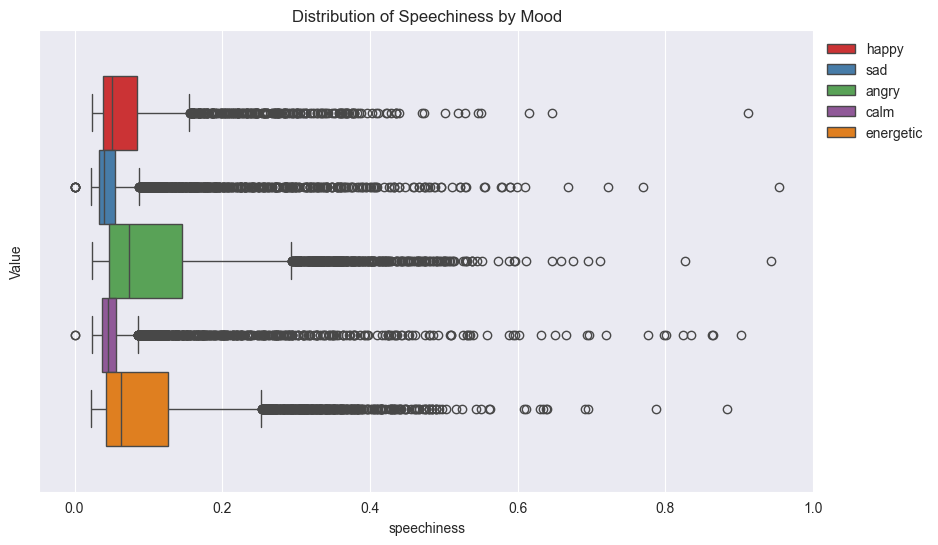

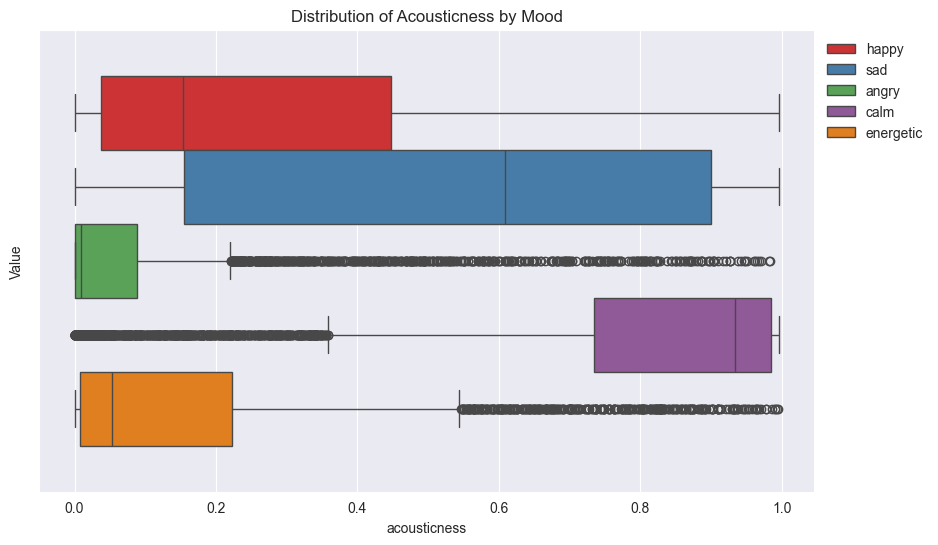

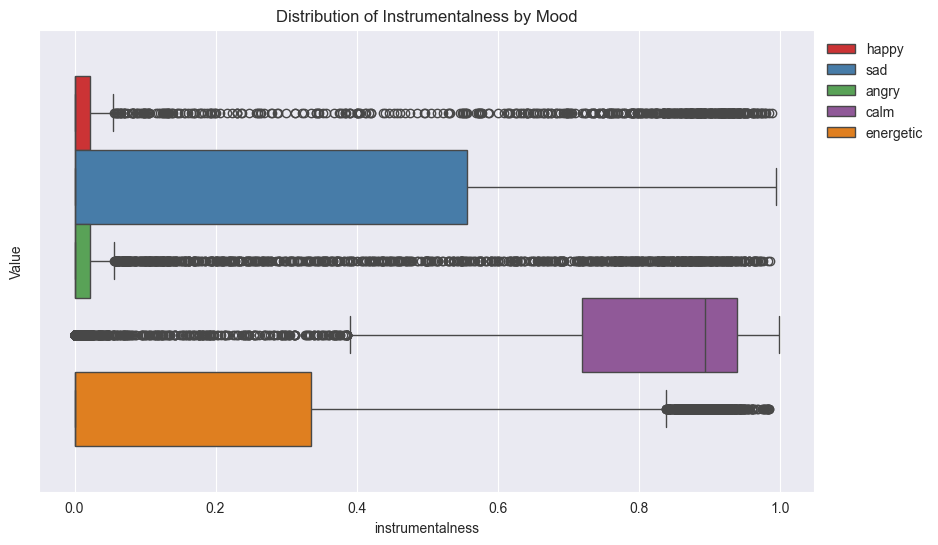

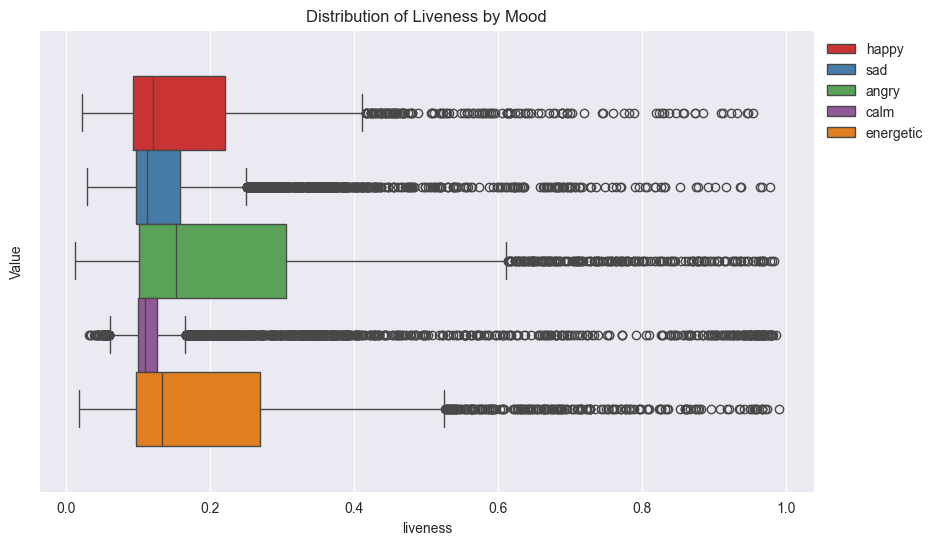

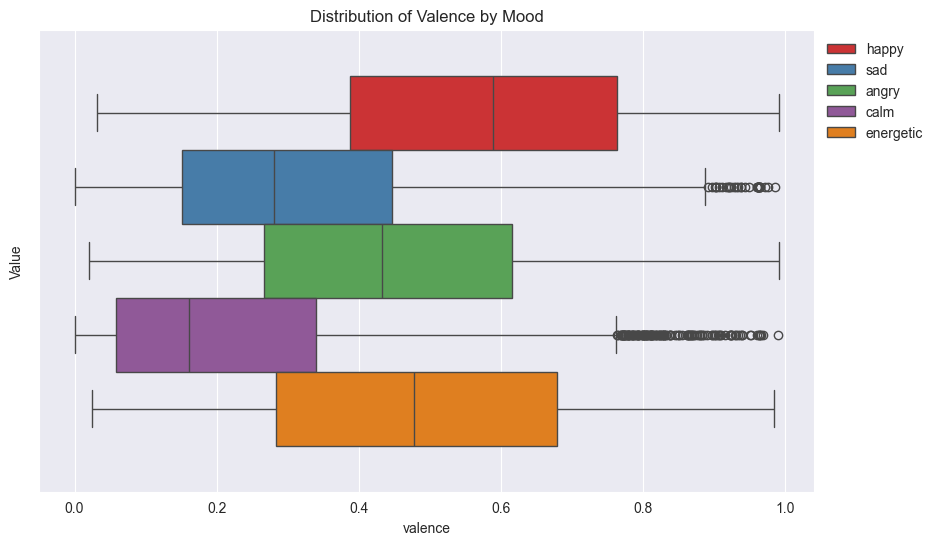

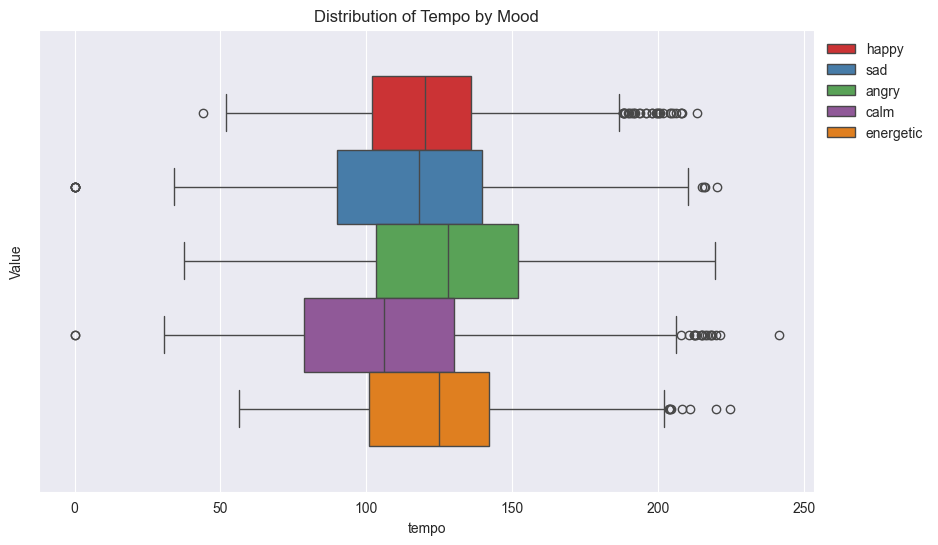

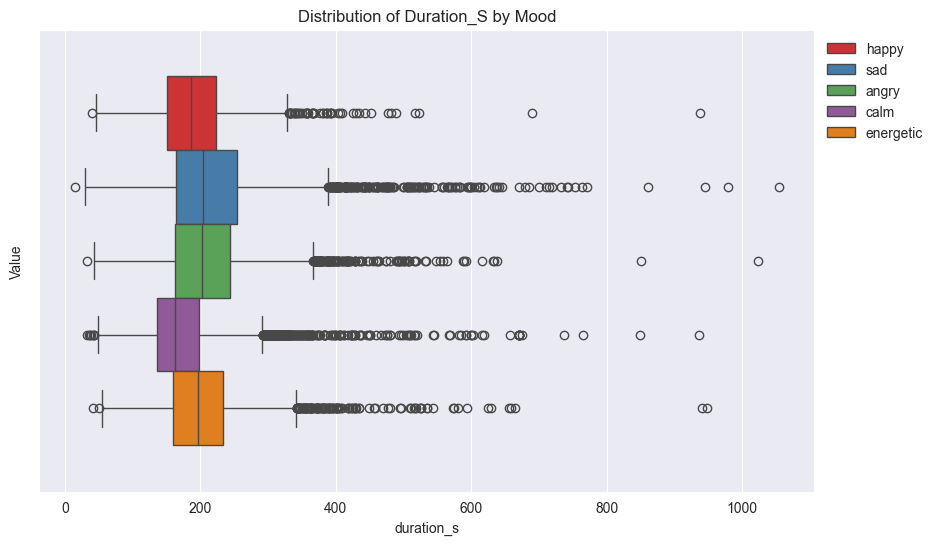

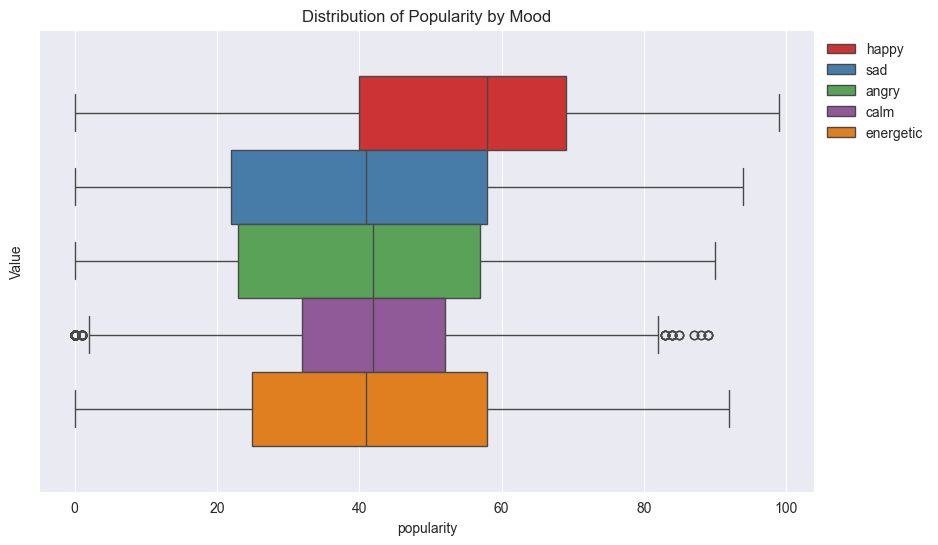

In [23]:
create_visualization(track_df, sns.boxplot, hue='mood', palette='Set1')

In [24]:
track_df.to_csv('/Users/bryanzhang/Desktop/career/projects/harmonic_horizons/data/cleaned_tracks2.csv')